### 问题建模

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import lightgbm as lgb

from matplotlib import colors 
from matplotlib.ticker import PercentFormatter 
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
all_data = pd.concat((train,test))
all_data = pd.get_dummies(all_data)
# 填充缺失值
all_data = all_data.fillna(all_data.mean())
# 数据切分
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [5]:
params = {'num_leaves': 63,
          'min_child_samples': 50,
          'objective': 'regression',
          'learning_rate': 0.01,
          'boosting_type': 'gbdt',
          'metric': 'rmse',
          'verbose': -1,
         } 
import lightgbm as lgb
folds = KFold(n_splits=5, shuffle=True, random_state=2020)
for trn_idx, val_idx in folds.split(X_train, y):
    trn_df, trn_label = X_train.iloc[trn_idx, :], y[trn_idx]
    val_df, val_label = X_train.iloc[val_idx, :], y[val_idx]
    dtrn = lgb.Dataset(trn_df, label = trn_label)
    dval = lgb.Dataset(val_df, label = val_label) 
    
    bst = lgb.train(params,dtrn, 
                    num_boost_round=1000,
                    valid_sets=[dtrn, dval],
                    early_stopping_rounds=100, verbose_eval=100)

Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 34583.7	valid_1's rmse: 33466.3
[200]	training's rmse: 22770.9	valid_1's rmse: 18964.6
[300]	training's rmse: 19899.1	valid_1's rmse: 16299.2
[400]	training's rmse: 18740.3	valid_1's rmse: 15997.4
Early stopping, best iteration is:
[397]	training's rmse: 18766.3	valid_1's rmse: 15991.7
Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 34408.6	valid_1's rmse: 33487
[200]	training's rmse: 21861.1	valid_1's rmse: 20431.9
[300]	training's rmse: 19073.3	valid_1's rmse: 17497.6
[400]	training's rmse: 18061.7	valid_1's rmse: 16475.3
[500]	training's rmse: 17425.2	valid_1's rmse: 15887.5
[600]	training's rmse: 16919	valid_1's rmse: 15448.9
[700]	training's rmse: 16482.9	valid_1's rmse: 15124.6
[800]	training's rmse: 16052.4	valid_1's rmse: 14837.6
[900]	training's rmse: 15635.8	valid_1's rmse: 14584.8
[1000]	training's rmse: 15248.4	valid_1's rmse: 14389.8
Did not meet early 

### 结果分析

In [6]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

model_ridge = Ridge()

In [7]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0, 0.5, 'rmse')

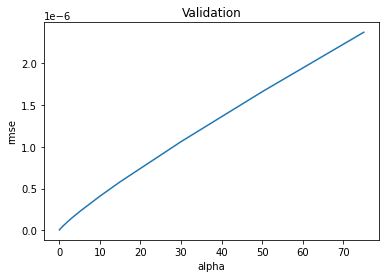

In [8]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [9]:
cv_ridge.min()

4.4950162841645694e-09

In [10]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)
rmse_cv(model_lasso).mean()

524.7581840312025

In [11]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 269 variables and eliminated the other 21 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

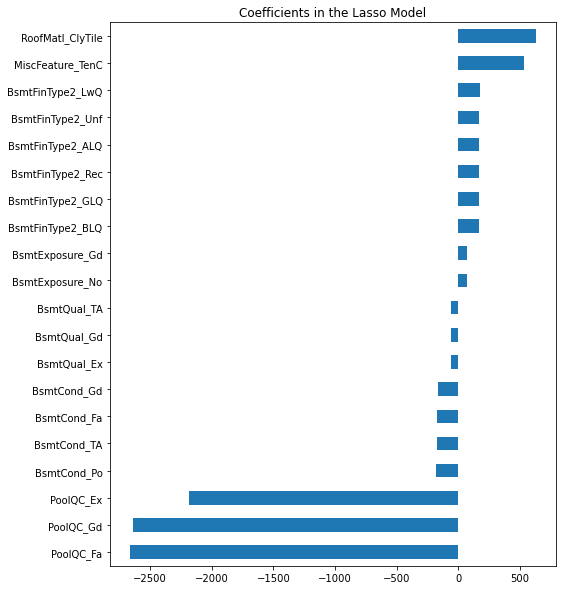

In [12]:
import matplotlib

import matplotlib.pyplot as plt

imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

<AxesSubplot:xlabel='preds', ylabel='residuals'>

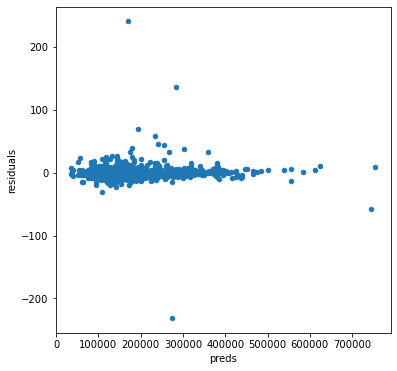

In [13]:
# 接下来观察真实结果与预测结果的残差
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [14]:
train = pd.concat([train,preds], axis=1)

In [16]:
import tsfresh as tsf
import pandas as pd
x = [1,2,4,8]
ts = pd.Series(x)  #数据x假设已经获取
ae = tsf.feature_extraction.feature_calculators.absolute_sum_of_changes(ts)

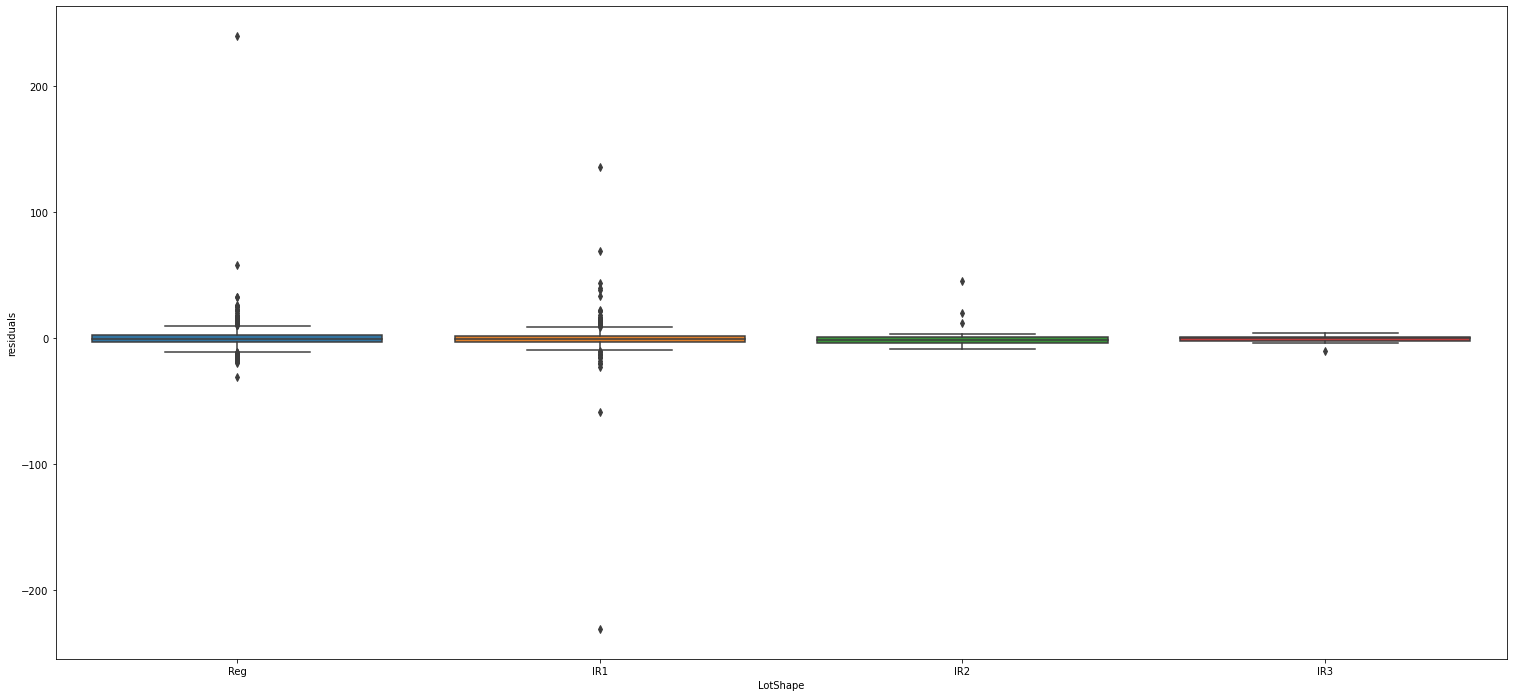

In [19]:
import seaborn as sns

var = 'LotShape'
data = pd.concat([train['residuals'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(26, 12))
fig = sns.boxplot(x=var, y="residuals", data=data)
#fig.axis(ymin=0, ymax=15);

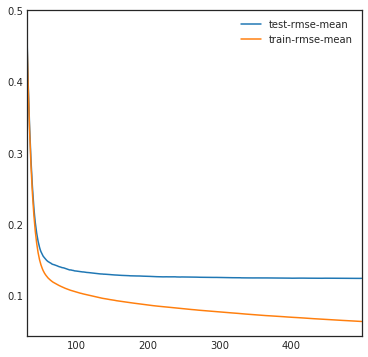

In [103]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1, 'silent': True}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

### 数据探索

In [20]:
stats = []
for col in train.columns:
    stats.append((col, train[col].nunique(), train[col].isnull().sum() * 100 / train.shape[0], train[col].value_counts(normalize=True, dropna=False).values[0] * 100, train[col].dtype))
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
stats_df.sort_values('Percentage of missing values', ascending=False)[:10]

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
72,PoolQC,3,99.520548,99.520548,object
74,MiscFeature,4,96.301370,96.301370,object
6,Alley,2,93.767123,93.767123,object
73,Fence,4,80.753425,80.753425,object
57,FireplaceQu,5,47.260274,47.260274,object
3,LotFrontage,110,17.739726,17.739726,float64
63,GarageQual,5,5.547945,89.794521,object
58,GarageType,6,5.547945,59.589041,object
60,GarageFinish,3,5.547945,41.438356,object
64,GarageCond,5,5.547945,90.821918,object


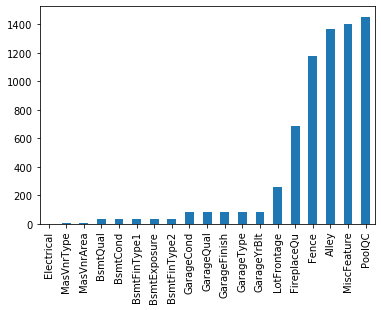

In [5]:
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [6]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

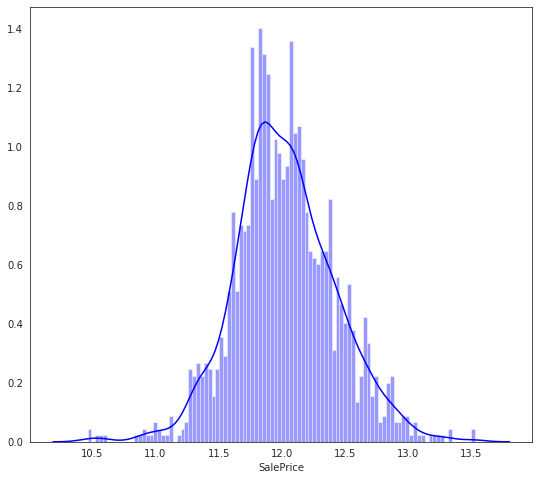

In [16]:
import scipy.stats as st
plt.figure(figsize=(9, 8))
sns.distplot(np.log(train['SalePrice']), color='b', bins=100, hist_kws={'alpha': 0.4})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa11a4d0cf8>,
      dtype=object)

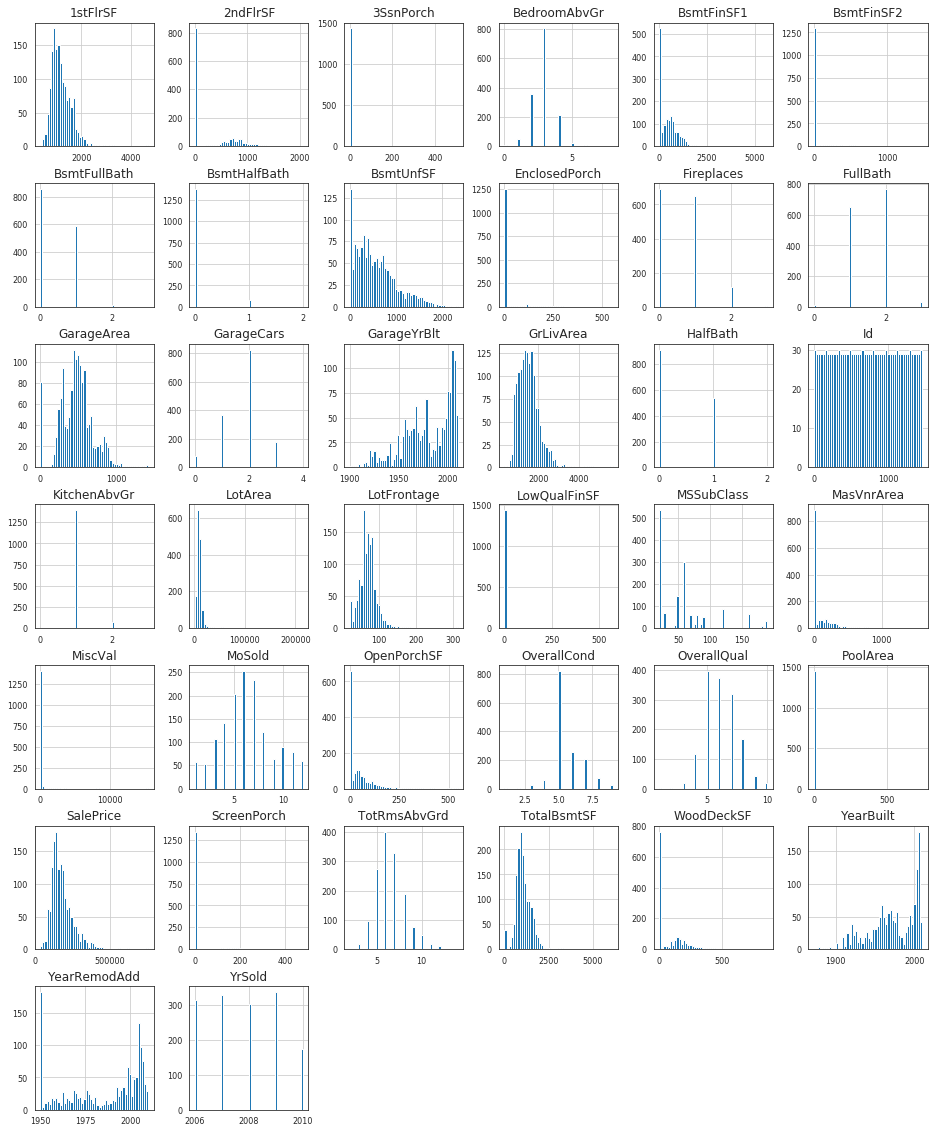

In [18]:
df_num = train.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

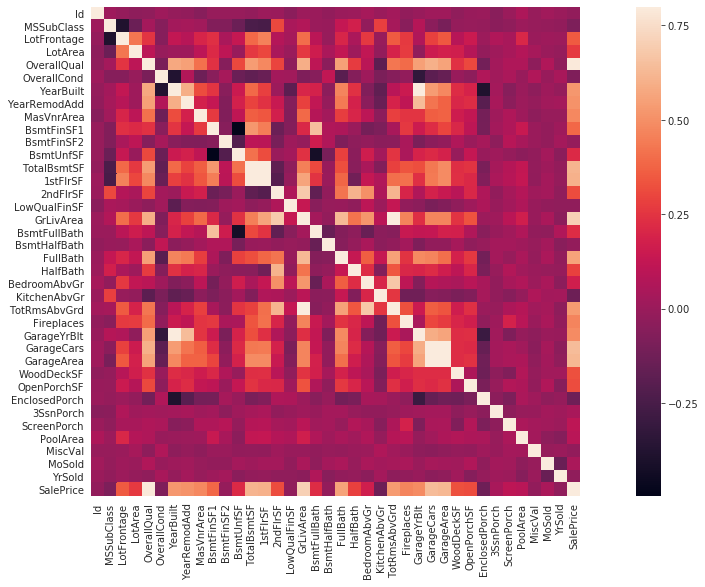

In [19]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

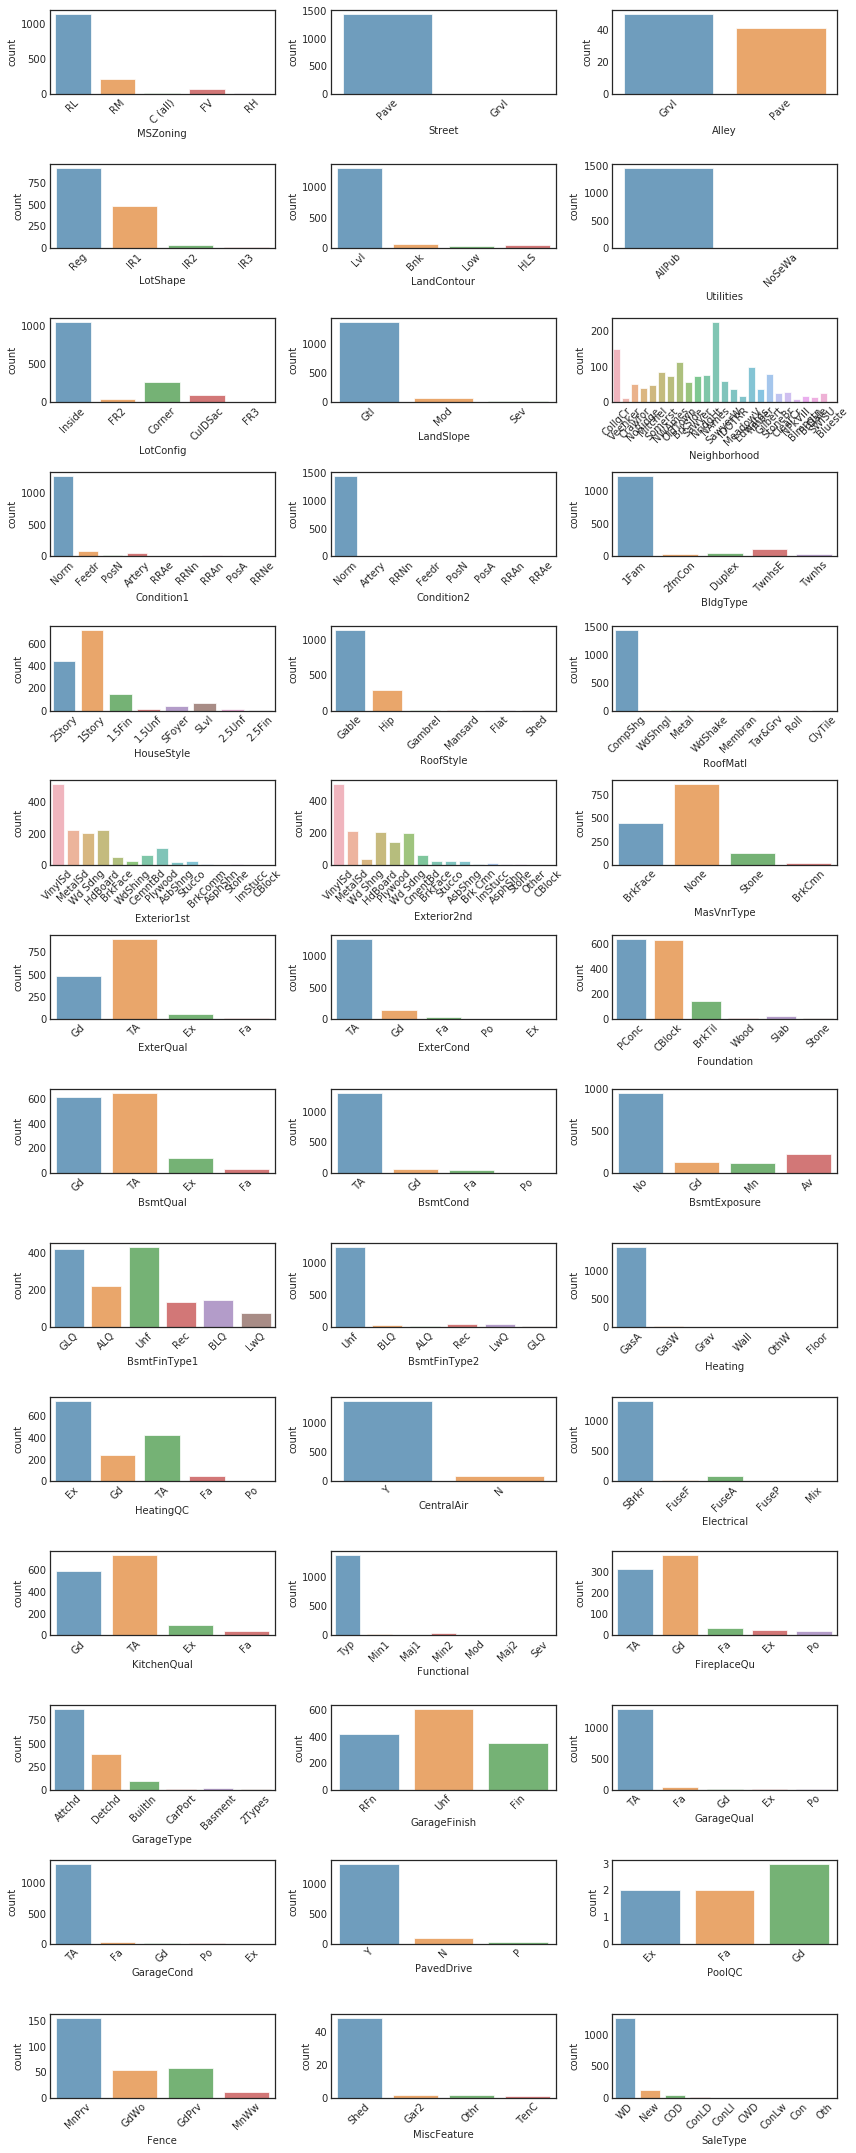

In [52]:
df_not_num = train.select_dtypes(include = ['O'])
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0f19a2898>,
      dtype=object)

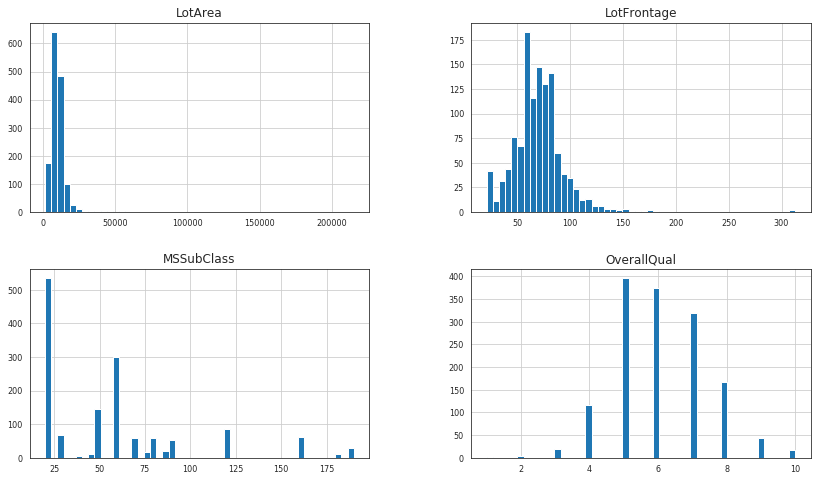

In [42]:
df_num = train.select_dtypes(include = ['float64', 'int64'])
df_num = df_num[df_num.columns.tolist()[1:5]]
df_num.hist(figsize=(14, 8), bins=50, xlabelsize=8, ylabelsize=8)

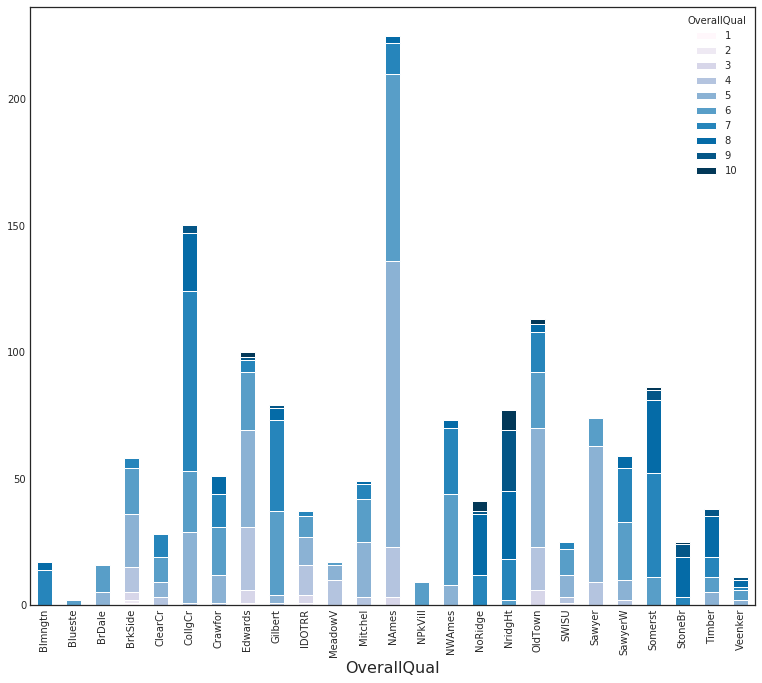

In [74]:
plt.style.use('seaborn-white')
type_cluster = train.groupby(['Neighborhood','OverallQual']).size()
type_cluster.unstack().plot(kind='bar',stacked=True, colormap= 'PuBu', figsize=(13,11),  grid=False)
plt.xlabel('OverallQual', fontsize=16)
plt.show()

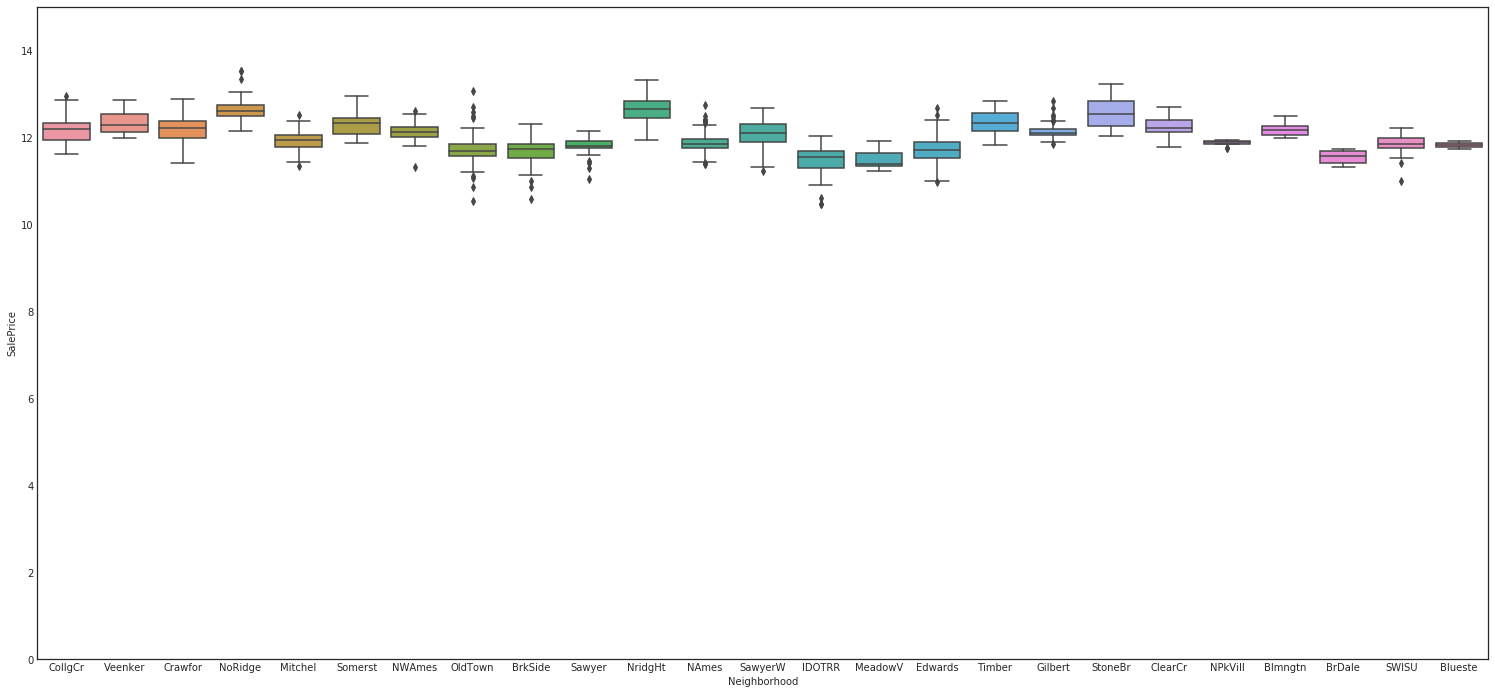

In [114]:
var = 'Neighborhood'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(26, 12))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=15);

### 特征工程

In [ ]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
ntrain = train.shape[0]
ntest = test.shape[0]
 
data = pd.concat([train, test], axis=0, sort=False)
# 删除缺失值比例大于50%的特征列
missing_cols = [c for c in data if data[c].isna().mean()*100 > 50]
data = data.drop(missing_cols, axis=1)
 
# 对object型的缺失特征进行填充
object_df = data.select_dtypes(include=['object'])
numerical_df = data.select_dtypes(exclude=['object'])
 
object_df = object_df.fillna('unknow')

In [ ]:
missing_cols = [c for c in numerical_df if numerical_df[c].isna().sum() > 0]
for c in missing_cols:
    numerical_df[c] = numerical_df[c].fillna(numerical_df[c].median())

In [ ]:
object_df = object_df.drop(['Heating','RoofMatl','Condition2','Street','Utilities'],axis=1)

In [ ]:
numerical_df.loc[numerical_df['YrSold'] < numerical_df['YearBuilt'], 'YrSold' ] = 2009
numerical_df['Age_House']= (numerical_df['YrSold'] - numerical_df['YearBuilt'])

In [ ]:
numerical_df['TotalBsmtBath'] = numerical_df['BsmtFullBath'] +
    numerical_df['BsmtHalfBath']*0.5
numerical_df['TotalBath'] = numerical_df['FullBath'] + numerical_df['HalfBath']*0.5 
numerical_df['TotalSA'] = numerical_df['TotalBsmtSF'] + numerical_df['1stFlrSF'] +\
numerical_df['2ndFlrSF']

In [ ]:
bin_map  = {'TA':2,'Gd':3, 'Fa':1,'Ex':4,'Po':1,'None':0,
'Y':1,'N':0,'Reg':3,'IR1':2,'IR2':1, \
'IR3':0,"None" : 0,"No" : 2, "Mn" : 2, 
"Av": 3,"Gd" : 4,"Unf" : 1, "LwQ": 2, \
"Rec" : 3,"BLQ" : 4, "ALQ" : 5, "GLQ" : 6}
object_df['ExterQual'] = object_df['ExterQual'].map(bin_map)
object_df['ExterCond'] = object_df['ExterCond'].map(bin_map)
object_df['BsmtCond'] = object_df['BsmtCond'].map(bin_map)
object_df['BsmtQual'] = object_df['BsmtQual'].map(bin_map)
object_df['HeatingQC'] = object_df['HeatingQC'].map(bin_map)
object_df['KitchenQual'] = object_df['KitchenQual'].map(bin_map)
object_df['FireplaceQu'] = object_df['FireplaceQu'].map(bin_map)
object_df['GarageQual'] = object_df['GarageQual'].map(bin_map)
object_df['GarageCond'] = object_df['GarageCond'].map(bin_map)
object_df['CentralAir'] = object_df['CentralAir'].map(bin_map)
object_df['LotShape'] = object_df['LotShape'].map(bin_map)
object_df['BsmtExposure'] = object_df['BsmtExposure'].map(bin_map)
object_df['BsmtFinType1'] = object_df['BsmtFinType1'].map(bin_map)
object_df['BsmtFinType2'] = object_df['BsmtFinType2'].map(bin_map)
 
PavedDrive = {"N" : 0, "P" : 1, "Y" : 2}

In [ ]:
object_df['PavedDrive'] = object_df['PavedDrive'].map(PavedDrive)
# 选择剩余的object特征
rest_object_columns = object_df.select_dtypes(include = ['object'])
# 进行one-hot编码
object_df = pd.get_dummies(object_df, columns = rest_object_columns.columns) 
 
data = pd.concat([object_df, numerical_df], axis=1, sort=False)

#### 特征选择

In [ ]:
def correlation(data, threshold):
    col_corr = set() 
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # 相似性分数与阈值对比
                colname = corr_matrix.columns[i]  # 获取列名
                col_corr.add(colname)
return col_corr

In [ ]:
all_cols = [c for c in data.columns if c not in ['SalePrice']]
corr_features = correlation(data[all_cols], 0.9)

### 模型融合

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import lightgbm as lgb

from matplotlib import colors 
from matplotlib.ticker import PercentFormatter 
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

In [27]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

all_data = pd.concat((train,test))
all_data = pd.get_dummies(all_data)
# 填充缺失值
all_data = all_data.fillna(all_data.mean())
# 数据切分
x_train = all_data[:train.shape[0]]
x_test = all_data[train.shape[0]:]
y_train = train.SalePrice

In [47]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from math import sqrt  
# 依然采用5折交叉验证 
kf = KFold(n_splits=5, shuffle=True, random_state=2020)                                                                                                                                                                                                                                   

class SklearnWrapper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)

def get_oof(clf):
    oof_train = np.zeros((x_train.shape[0],))
    oof_test = np.zeros((x_test.shape[0],))
    oof_test_skf = np.empty((5, x_test.shape[0]))
    
    for i, (train_index, valid_index) in enumerate(kf.split(x_train, y_train)):
        trn_x, trn_y, val_x, val_y = x_train.iloc[train_index], y_train[train_index],\
            x_train.iloc[valid_index], y_train[valid_index]
        clf.train(trn_x, trn_y)

        oof_train[valid_index] = clf.predict(val_x)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [48]:
et_params = {
   'n_estimators': 100,
    'max_features': 0.5,
    'max_depth': 12,
    'min_samples_leaf': 2,
}
rf_params = {
    'n_estimators': 100,
    'max_features': 0.2,
    'max_depth': 12,
    'min_samples_leaf': 2,
}
rd_params={'alpha': 10}
ls_params={ 'alpha': 0.005}
et = SklearnWrapper(clf=ExtraTreesRegressor, seed=2020, params=et_params)
rf = SklearnWrapper(clf=RandomForestRegressor, seed=2020, params=rf_params)
rd = SklearnWrapper(clf=Ridge, seed=2020, params=rd_params)
ls = SklearnWrapper(clf=Lasso, seed=2020, params=ls_params)

et_oof_train, et_oof_test = get_oof(et)
rf_oof_train, rf_oof_test = get_oof(rf)
rd_oof_train, rd_oof_test = get_oof(rd)
ls_oof_train, ls_oof_test = get_oof(ls)

(1460,)
(1460,)
(1460,)
(1460,)


In [51]:
def stack_model(oof_1, oof_2, oof_3, oof_4, predictions_1, predictions_2, predictions_3, predictions_4, y):
    train_stack = np.hstack([oof_1, oof_2, oof_3, oof_4])
    test_stack = np.hstack([predictions_1, predictions_2, predictions_3, predictions_4])
    
    oof = np.zeros((train_stack.shape[0],))
    predictions = np.zeros((test_stack.shape[0],))
    scores = []

    for fold_, (trn_idx, val_idx) in enumerate(kf.split(train_stack, y)): 
        trn_data, trn_y = train_stack[trn_idx], y[trn_idx]
        val_data, val_y = train_stack[val_idx], y[val_idx]
        
        clf = Ridge(random_state=2020)
        clf.fit(trn_data, trn_y)

        oof[val_idx] = clf.predict(val_data)
        predictions += clf.predict(test_stack) / 5
        
        score_single = sqrt(mean_squared_error(val_y, oof[val_idx]))
        scores.append(score_single)
        print(f'{fold_+1}/{5}', score_single)
    print('mean: ',np.mean(scores))
   
    return oof, predictions

oof_stack , predictions_stack  = stack_model(et_oof_train, rf_oof_train, rd_oof_train, ls_oof_train, \
                                             et_oof_test, rf_oof_test, rd_oof_test, 
    ls_oof_test, y_train)

1/5 2.656163420378807e-07
2/5 5.284651864800996e-07
3/5 2.529874366848234e-07
4/5 9.587127838370597e-05
5/5 3.9968354382579686e-07
mean:  1.9463606178546913e-05
